# EXERCISE 11.1

### Overview

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data.

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

We start by considering the very simple case of a linear fit:
$$
f(x)=2x+1
$$

In [ ]:
import numpy as np

m = 2
b = 1

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

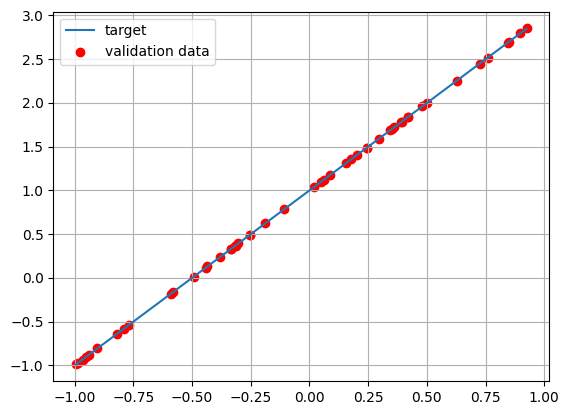

In [ ]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# get a summary of our composed model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.2172 - mse: 1.2172 - val_loss: 0.8206 - val_mse: 0.8206
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8154 - mse: 0.8154 - val_loss: 0.5274 - val_mse: 0.5274
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5432 - mse: 0.5432 - val_loss: 0.3578 - val_mse: 0.3578
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3777 - mse: 0.3777 - val_loss: 0.2537 - val_mse: 0.2537
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2781 - mse: 0.2781 - val_loss: 0.1870 - val_mse: 0.1870
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2028 - mse: 0.2028 - val_loss: 0.1416 - val_mse: 0.1416
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1518 - mse: 0.1518 - val_loss: 0.1093 - val_mse: 0.1093
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1143 - mse: 0.1143 - val_loss: 0.0856 - val_mse: 0.0856
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0914 - mse:

In [ ]:
# return weights and biases
model.get_weights()

[array([[1.9535601]], dtype=float32), array([0.999396], dtype=float32)]

In [ ]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.6765e-04 - mse: 6.6765e-04

Test loss: 0.0006853900849819183
Test accuracy: 0.0006853900849819183


In [ ]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.6765e-04 - mse: 6.6765e-04

Test loss: 0.0006853900849819183
Test accuracy: 0.0006853900849819183


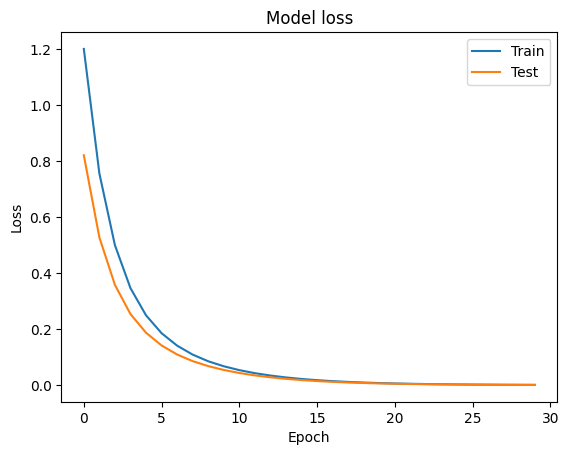

In [ ]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


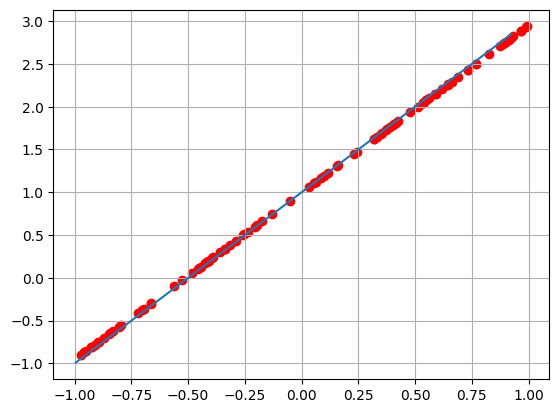

In [ ]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

###EXERCISE 11.1

The objective is to quantify how does the linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

m = 2
b = 1

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)


In [ ]:
#Testing epoch number:

epoch_list = np.arange(10, 100, 10)
score_list = [0]*len(epoch_list)
loss_train = [0]*len(epoch_list)
loss_val = [0]*len(epoch_list)


for i in range(len(epoch_list)):
  model = tf.keras.Sequential()
  model.add(Dense(1, input_shape=(1,)))

  model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

  epoch = epoch_list[i]
  history = model.fit(x=x_train, y=y_train,
            batch_size=32, epochs=epoch,
            shuffle=True,
            validation_data=(x_valid, y_valid), verbose = 0)

  score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
  score_list[i] = score[1]
  loss_train[i] = history.history['loss']
  loss_val[i] = history.history['val_loss']

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2239 - mse: 0.2239
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0326 - mse: 0.0326
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.3504e-04 - mse: 1.3504e-04
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.0489e-04 - mse: 4.0489e-04
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3752e-06 - mse: 3.3752e-06
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.2084e-06 - mse: 6.2084e-06
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8190e-07 - mse: 3.8190e-07
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0357e-07 - mse: 1.0357e-07
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5.9151e-09 - mse: 5.9151e-09


[Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'), None]

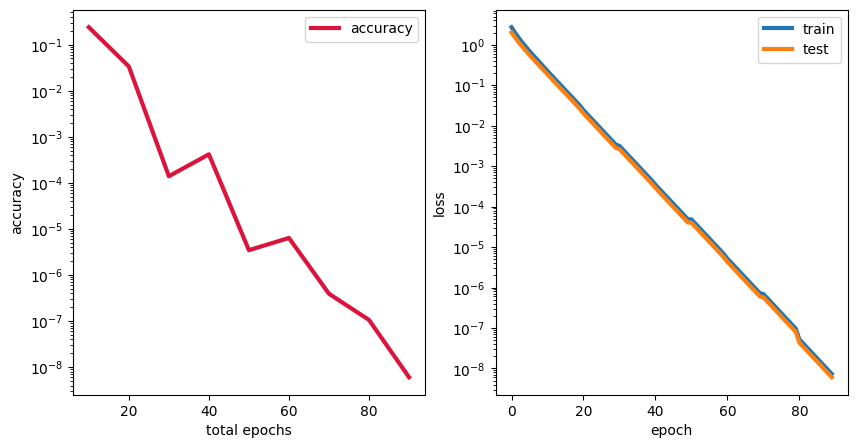

In [ ]:
#Plot:

accu_loss_t = [0]*len(loss_train[-1])
accu_loss_v = [0]*len(loss_train[-1])
accu = [0]*len(loss_train[-1])

for i in range(len(loss_train)):
  for j in range(epoch_list[i]):
    accu_loss_t[j] += loss_train[i][j]
    accu_loss_v[j] += loss_val[i][j]
    accu[j] += 1

accu_loss_t = [accu_loss_t[j]/accu[j] for j in range(len(accu_loss_t))]
accu_loss_v = [accu_loss_v[j]/accu[j] for j in range(len(accu_loss_v))]

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].plot(epoch_list, score_list, color='crimson', lw=3, label='accuracy')
ax[1].plot(accu_loss_t, lw=3, label = 'train')
ax[1].plot(accu_loss_v, lw=3, label = 'test')

ax[0].legend()
ax[1].legend()

ax[0].set(xlabel = 'total epochs', ylabel = 'accuracy', yscale = 'log')
ax[1].set(xlabel = 'epoch', ylabel = 'loss', yscale = 'log')

As we can see, more total epochs correlates with lower loss (here is represented loss for the last epoch)

In [ ]:
#Testing data set size:

num_list = np.arange(50,4050, 200)
score_list = [0]*len(num_list)
loss_train = [0]*len(num_list)
loss_val = [0]*len(num_list)
ep = 25

for i in range(len(num_list)):
  x_train = np.random.uniform(-1, 1, num_list[i])
  x_valid = np.random.uniform(-1, 1, int(num_list[i]*0.1))
  y_train = np.random.normal(m * x_train + b, sigma)
  y_valid = np.random.normal(m * x_valid + b, sigma)

  model = tf.keras.Sequential()
  model.add(Dense(1, input_shape=(1,)))

  model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

  history = model.fit(x=x_train, y=y_train,
            batch_size=32, epochs=ep,
            shuffle=True,
            validation_data=(x_valid, y_valid), verbose = 0)

  score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
  score_list[i] = score[1]
  loss_train[i] = history.history['loss']
  loss_val[i] = history.history['val_loss']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.6092 - mse: 0.6092
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1141 - mse: 0.1141
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0084 - mse: 0.0084
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4154e-04 - mse: 1.4154e-04
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.9685e-04 - mse: 4.9685e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5549e-06 - mse: 1.5549e-06 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.5143e-08 - mse: 9.5143e-08
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1367e-07 - mse: 6.1367e-07 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9444e-09 - mse: 4.9444e-09 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6858e-09 - mse: 4.6858e-09 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.5995e-11 - mse: 9.5995e-11 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2940e-11 - mse: 2.2940e-11 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8369e-11 - mse: 1.8369e-11 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.41

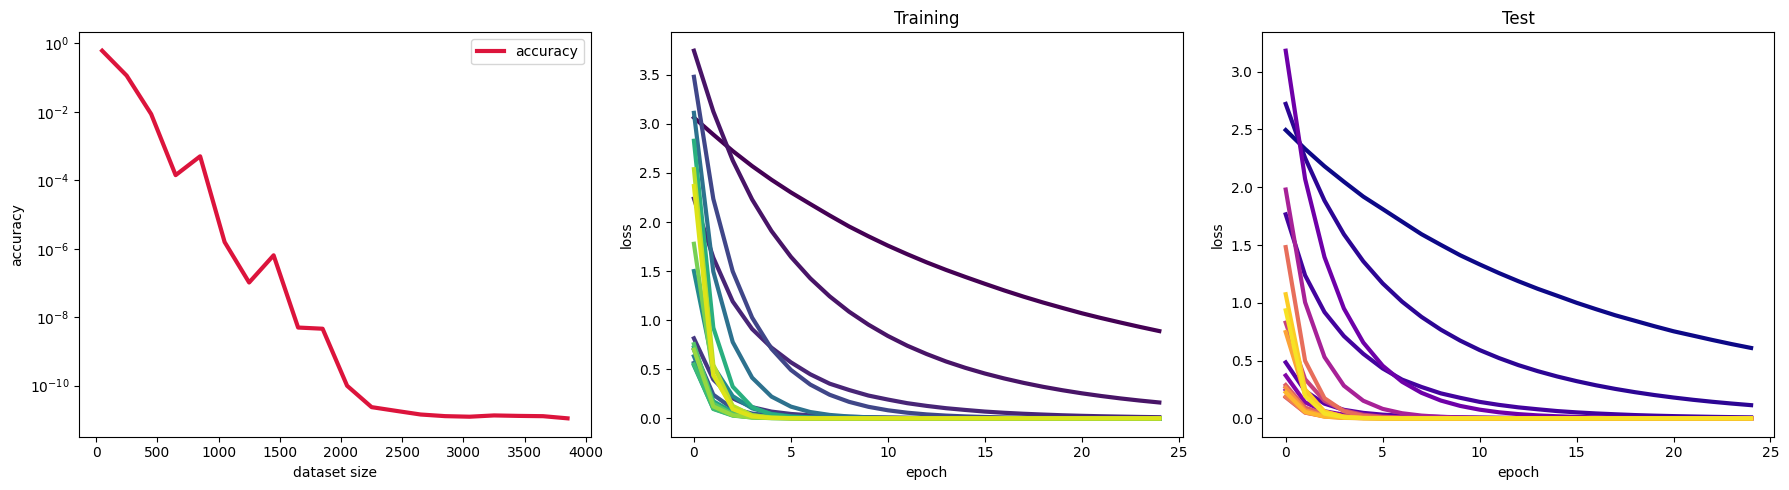

In [ ]:
# Plot:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(18,5))

colors_train = plt.cm.viridis(np.linspace(0, 1, len(loss_train)))
colors_val = plt.cm.plasma(np.linspace(0, 1, len(loss_val)))

ax[0].plot(num_list, score_list, color='crimson', lw=3, label='accuracy')

for i in range(len(loss_train)-1):
    ax[1].plot(loss_train[i],
               color=colors_train[i], lw=3)

for i in range(len(loss_val)-1):
    ax[2].plot(loss_val[i],
               color=colors_val[i], lw=3)

ax[0].legend()

ax[0].set(xlabel='dataset size', ylabel='accuracy', yscale='log')
ax[1].set(xlabel='epoch', ylabel='loss', title='Training')
ax[2].set(xlabel='epoch', ylabel='loss', title='Test')

plt.tight_layout()
plt.show()

A more interesting result seems to emerge from analizing different dataset sizes. I considered sizes from 50 to 4050 datapoints, in increments of 200 datapoints. For the validation sets, I considered a size 10% the size of the training set.

In the plots on the right, the color indicates higher sizes changing from deep blue to yellow or orange hues, respectively.

We can see that the accuracy actually seems to plateau after around 2000 datapoints, with consequently lesser improvement from using bigger datasets after that point.

Analizing the loss function history through epochs among different sizes, we can instead see that we obtain smoother learning with bigger data sets.

Finally, more noise makes training harder, even though increasing epochs and dimensions of the data set can help.

###EXERCISE 11.2


I now extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In [ ]:
def generate_poly(N=1000, sigma = 0.1, coeffs = [4,-3,-2,3], seed = 1, data_lim = [-1, 1]):
  assert(data_lim[0] < data_lim[1])
  np.random.seed(seed)
  x = np.random.uniform(data_lim[0], data_lim[1], N)
  x.sort()
  y = np.zeros(len(x))
  for i, coeff in enumerate(coeffs):
      y += coeff * (x ** i)

  noise = np.random.normal(0, sigma, N)
  y += noise

  return x, y

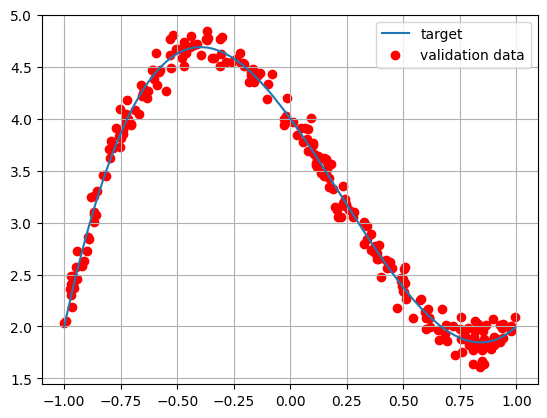

In [ ]:
x_train, y_train = generate_poly(N=2500)
x_valid, y_valid = generate_poly(N=250)
y_target = 4 - 3*x_valid - 2*x_valid**2 + 3*x_valid**3

plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

For my neural network I choose two hidden layers with 8 neurons each, and 1 output layer with 1 neuron. For the hidden layers I choose the hyperbolic tangent as the activation function, while for the output one there is no activation function (regression). I choose this architecture adding incrementally neurons to the previous one until I was satisfied with the result.

For the optimizer I opted for 'adam', while I kept mean square error as the loss function.

The data set has 1000 points with a noise of 0.1.

I chose to use 50 epochs comparing with the previous analysis and not more to avoid overfitting.

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(8, input_dim=1, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=50,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose = 0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


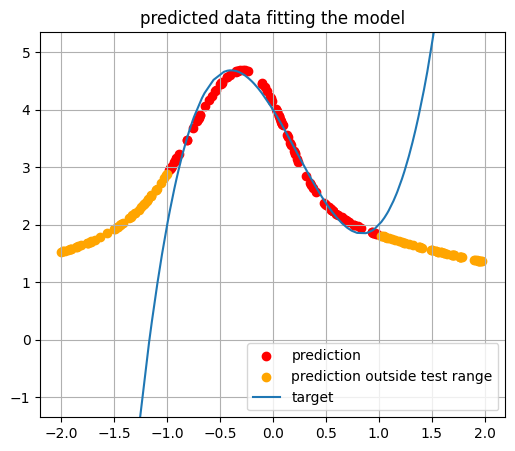

In [ ]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

x_out = np.concatenate([np.random.uniform(-2, -1, 50), np.random.uniform(1, 2, 50)])
y_predicted_out = model.predict(x_out)


x_tot = np.random.uniform(-2, 2, 200)
x_tot.sort()
y_target = 4 - 3*x_tot - 2*x_tot**2 + 3*x_tot**3

fig, ax = plt.subplots(1,1, figsize=(6,5))

ax.scatter(x_predicted, y_predicted,color='r', label = 'prediction')
ax.scatter(x_out, y_predicted_out,color='orange', label = 'prediction outside test range')
ax.plot(x_tot, y_target, label = 'target')
ax.set(title='predicted data fitting the model', ylim = [-1.35, 5.35])

ax.legend()

plt.grid(True)
plt.show()

As it can be seen the prediction closely fits the model in the training range, but fastly deviates outside!

Here I tried other models and optimizers, trying to see the results on deeper and deepr nets, with more or less the same results:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


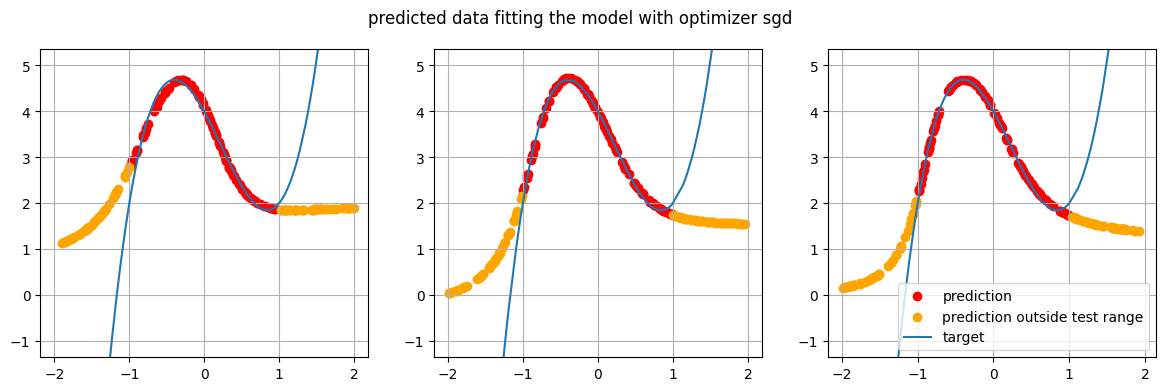

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


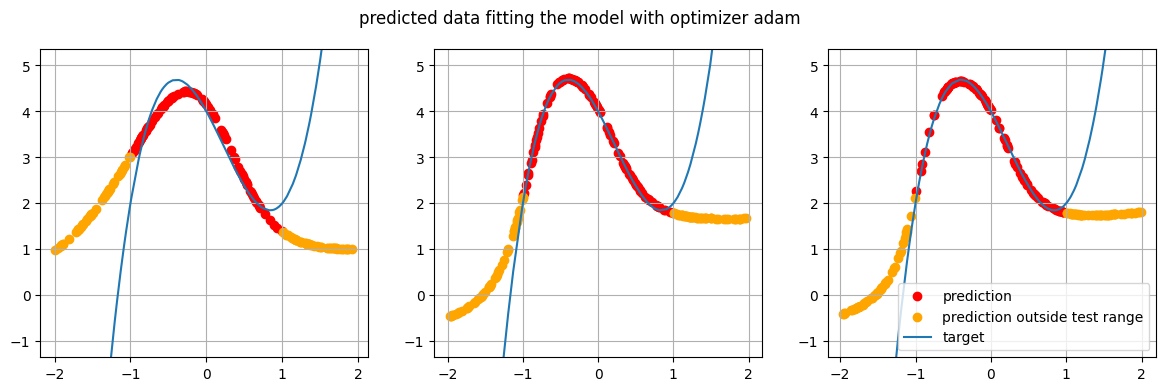

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


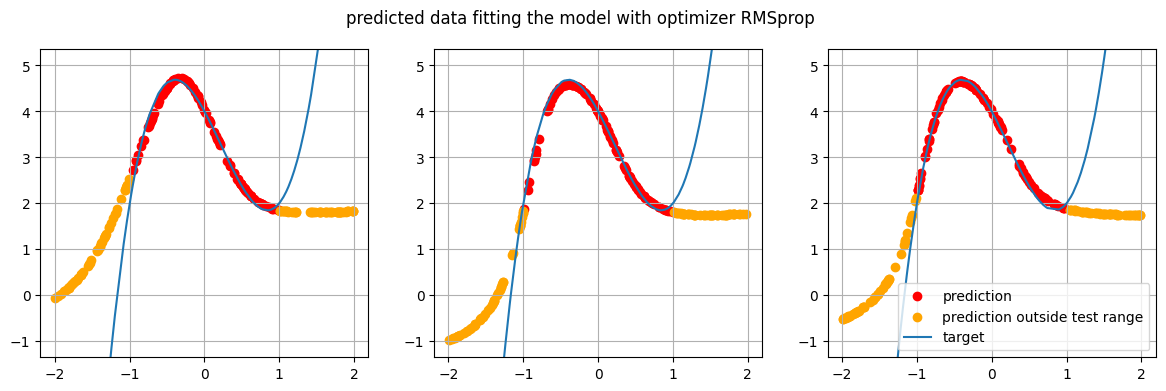

In [ ]:
opts = ['sgd', 'adam', 'RMSprop' ]
density = 3
plot_scale = 0.8

for k in range(len(opts)):

  fig, ax = plt.subplots(1,3, figsize=(6*density*plot_scale,5*plot_scale))

  for i in range(density):
    model = tf.keras.Sequential()
    model.add(Dense(4, input_dim=1, activation='tanh'))
    #model.add(Dense(4, input_dim=1, activation='tanh'))
    for j in range(2*i):
      model.add(Dense(8*(i+1), activation='tanh'))
    model.add(Dense(1))
    model.compile(optimizer=opts[k], loss='mse', metrics=['mse'])

    history = model.fit(x=x_train, y=y_train,
              batch_size=32, epochs=50,
              shuffle=True,
              validation_data=(x_valid, y_valid), verbose = 0)

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)

    x_out = np.concatenate([np.random.uniform(-2, -1, 50), np.random.uniform(1, 2, 50)])
    y_predicted_out = model.predict(x_out)


    x_tot = np.random.uniform(-2, 2, 200)
    x_tot.sort()
    y_target = 4 - 3*x_tot - 2*x_tot**2 + 3*x_tot**3

    ax[i].scatter(x_predicted, y_predicted,color='r', label = 'prediction')
    ax[i].scatter(x_out, y_predicted_out,color='orange', label = 'prediction outside test range')
    ax[i].plot(x_tot, y_target, label = 'target')
    ax[i].set(ylim = [-1.35, 5.35], title=)

    ax[i].grid(True)
  ax[-1].legend()


  fig.suptitle('predicted data fitting the model with optimizer ' + opts[k])
  plt.show()
  plt.close()

the prediction outside the range is consistently wrong on the right side, while on the left side at deeper nets starts to deviate further away from the range of the training data set.

###EXERCISE 1.3

Finally, I try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [ ]:
def generate_sin_2D(N=1000, sigma=0.05, seed=1, data_lim=[[-2.5, 2.5], [-2.5, 2.5]]):
    assert(data_lim[0][0] < data_lim[0][1])
    assert(data_lim[1][0] < data_lim[1][1])
    np.random.seed(seed)

    x = np.random.uniform(data_lim[0][0], data_lim[0][1], N)
    y = np.random.uniform(data_lim[1][0], data_lim[1][1], N)

    z = np.sin(x**2 + y**2)

    noise = np.random.normal(0, sigma, N)
    z += noise

    return np.column_stack((x, y)), z

For the net architecture i chose


*   input layer with dimension 2 for the two coordinates
*   three hidden layers of 64, 64, and 32 neurons each, fully connected, with tanh activation
*   output layer with 1 neuron for the prediction of the z coordinate

The choice was made after setting input and otput layers adding dense layers of 32 neurons each until I was satisfied with the result.

The training dataset was made with 10000 points

In [ ]:
size_train = 10000

x_train, y_train = generate_sin_2D(N=size_train, sigma=0.1)
x_valid, y_valid = generate_sin_2D(N=int(size_train*0.1), sigma=0.1)

model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(2,)))
#model.add(Dense(64, input_shape=(2,), activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose = 0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


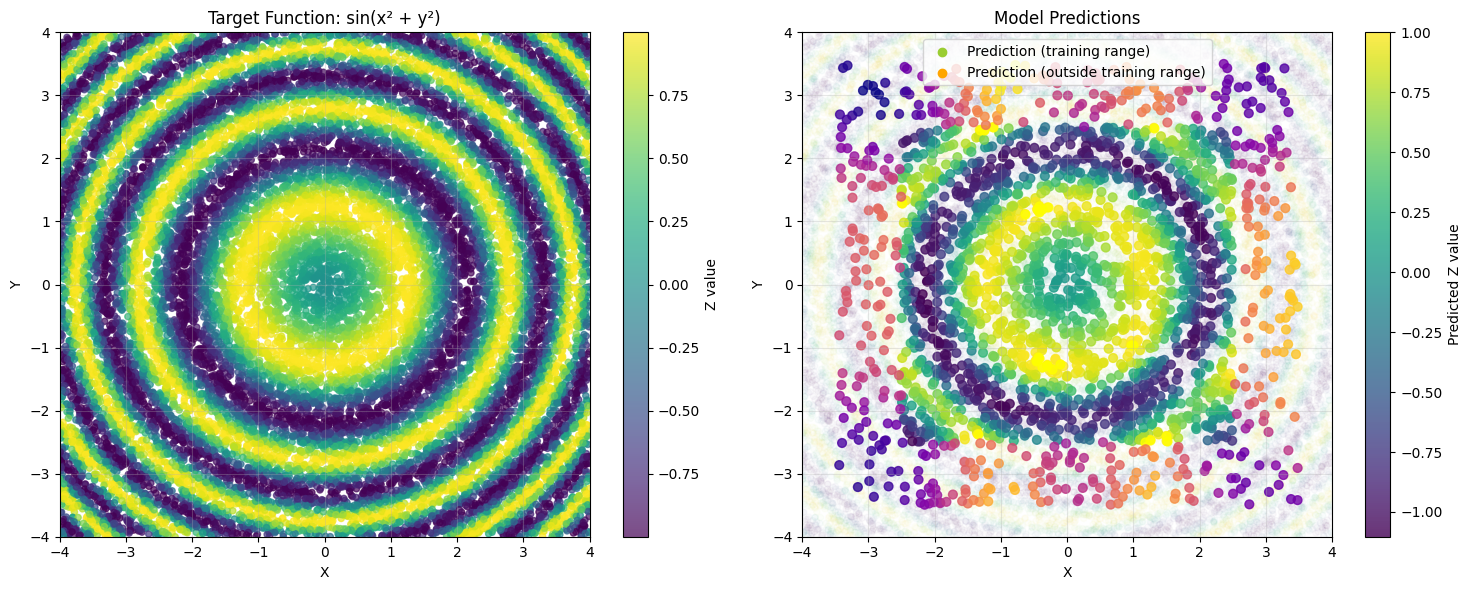

In [ ]:
#generate points to predict with network
n_predicted = 2000
x_predicted = np.random.uniform(-2.5, 2.5, n_predicted)
y_predicted = np.random.uniform(-2.5, 2.5, n_predicted)
X_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model.predict(X_predicted)

#generate points outside trainig bounds
n_out = 500
x_out = np.concatenate([np.random.uniform(-3.5, -2.5, n_out//4), np.random.uniform(2.5, 3.5, n_out//4)])
x_out_2 = np.random.uniform(-2.5, 2.5, n_out//2)
x_out = np.concatenate([x_out, x_out_2])
y_out = np.random.uniform(-3.5, 3.5, n_out//2)
y_out_2 = np.concatenate([np.random.uniform(-3.5, -2.5, n_out//4), np.random.uniform(2.5, 3.5, n_out//4)])
y_out = np.concatenate([y_out, y_out_2])

X_out = np.column_stack((x_out, y_out))
z_predicted_out = model.predict(X_out)

#Plots:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))


#paint the plane with sin(x**2 + y**2) function for reference
n_target = 20000
x_target = np.random.uniform(-4, 4, n_target)
y_target = np.random.uniform(-4, 4, n_target)
z_target = np.sin(x_target**2 + y_target**2)

scatter_target = ax[0].scatter(x_target, y_target, c=z_target, cmap='viridis', s=20, alpha=0.7)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Target Function: sin(x² + y²)')
ax[0].grid(True, alpha=0.3)
ax[0].set_xlim(-4, 4)
ax[0].set_ylim(-4, 4)

cbar1 = plt.colorbar(scatter_target, ax=ax[0])  #to distinguish height
cbar1.set_label('Z value')

z_maxs = [[],[],[]]
z_mins = [[],[],[]]
z_colors = z_predicted.flatten()  #in order for the gradient to be comparable to the target function's, I must manually color all z>1 and z<-1
for i in range(len(z_colors)):
  if z_colors[i]>1:
    z_maxs[0].append(x_predicted[i])
    z_maxs[1].append(y_predicted[i])
    z_maxs[2].append(z_colors[i])
    z_colors[i] = 1
  if z_colors[i]<-11:
    z_mins[0].append(x_predicted[i])
    z_mins[1].append(y_predicted[i])
    z_mins[2].append(z_colors[i])
    z_colors[i] = 1

#plot predictions
scatter_pred = ax[1].scatter(x_predicted, y_predicted, c=z_colors, cmap='viridis', s=40, alpha=0.8)
ax[1].scatter(z_mins[0], z_mins[1], c='midnightblue', s=40, alpha=0.8,)
ax[1].scatter(z_maxs[0], z_maxs[1], c='yellow', s=40, alpha=0.8,)

scatter_out = ax[1].scatter(x_out, y_out, c=z_predicted_out.flatten(), cmap='plasma', s=40, alpha=0.8)

scatter_target = ax[1].scatter(x_target, y_target, c=z_target, cmap='viridis', s=20, alpha=0.025, zorder = 0)

#only for legend:
ax[1].scatter(-200, 200, color='yellowgreen', label='Prediction (training range)')
ax[1].scatter(-200, 200, color='orange', label='Prediction (outside training range)')


ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_title('Model Predictions')
ax[1].grid(True, alpha=0.3)
ax[1].legend()
ax[1].set_xlim(-4, 4)
ax[1].set_ylim(-4, 4)

cbar2 = plt.colorbar(scatter_pred, ax=ax[1])
cbar2.set_label('Predicted Z value')

plt.tight_layout()
plt.show()

As we can see the result is highly predictive in the coordinate range of the training data set, but fastly diverges outside!